In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats




# font size for plots
SMALL_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=  BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rcParams["font.family"] = "serif"

#

#=================================================================================

#speed
ylabel = "Translation Speed"
ymin = 0.
ymax = 50.
xlabelString = "Quantiles of Conditional Translation Speed"
#=================================================================================

var = 'tang'
ymin = -80.
ymax =  80.
ylabel = "Tangential Acceleration"
xlabelString = "Quantiles of Conditional Tangental Acceleration"

mon = '_JASO_'
dom = '25_45'

fileName = var+mon + "atl_"+dom+".nc"
output1 = "scatter_" + var+ mon + "atl_"+dom+".png"
output2 = "beta_" + var+ mon + "atl_"+dom+".png"





In [2]:
#open the data set
ds = xr.open_dataset(fileName)
print(ds)

<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 16373, ncl6: 16373, ncl7: 54, ncl8: 54, storm: 16373)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [3]:
# now lets read the yearly averaged data and establish some basic trend using OLS = this is the trend of the mean
#
yData  = ds.yearly
years  = ds.years
dfA = pd.DataFrame({'years':years, 'yData':yData, 'const':1})
reg1 = sm.OLS(endog=dfA['yData'], exog=dfA[['const', 'years']],missing='drop')
results = reg1.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  yData   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.08412
Date:                Wed, 18 Nov 2020   Prob (F-statistic):              0.773
Time:                        21:39:34   Log-Likelihood:                -121.32
No. Observations:                  54   AIC:                             246.6
Df Residuals:                      52   BIC:                             250.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1418     40.568     -0.176      0.8

In [4]:
Data  = ds.Data
Time  = ds.Fracyear

print(Data.head())
print(Time.head())

<xarray.DataArray 'Data' (ncl5: 5)>
array([  0.438823,  -3.496002, -15.381972, -20.622266,  -2.678359])
Dimensions without coordinates: ncl5
Attributes:
    units:    km/hr per day
    name:     Acceleration
<xarray.DataArray 'Fracyear' (ncl6: 5)>
array([1966.5442, 1966.5446, 1966.5449, 1966.5452, 1966.5455], dtype=float32)
Dimensions without coordinates: ncl6
Attributes:
    calendar:   standard
    long_name:  Time
    units:      YYYY + fractional portion of year
    NCL:        contributed.ncl: function yyyymmddhh_to_yyyyFrac


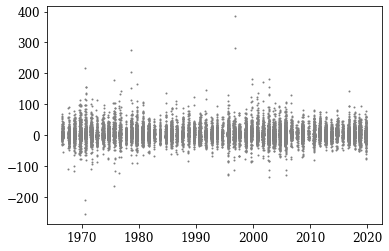

In [5]:
#plt.plot(years, accel, color='grey',markersize=1)
plt.plot(Time, Data,'o', color='grey',markersize=1)


In [6]:
# Linear regression using numpy
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)


R-squared : 0.000003
slope    : 0.002517
p value  : 0.814158
intercept  : -0.633458


In [7]:
df = pd.DataFrame({'Time':Time, 'Data':Data})
#print(df)

In [8]:
# A frst order polynomial fit to get the linear regression
poly = smf.ols(formula='Data ~ 1 +  Time', data=df).fit()
print (poly.summary())


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05526
Date:                Wed, 18 Nov 2020   Prob (F-statistic):              0.814
Time:                        21:39:35   Log-Likelihood:                -73971.
No. Observations:               16373   AIC:                         1.479e+05
Df Residuals:                   16371   BIC:                         1.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6335     21.354     -0.030      0.9

In [9]:

mod = smf.quantreg('Data ~ Time', df)
result = mod.fit(q=.5)
print(result.summary())
#print (dir(res))

print(result.pvalues['Time'])
print(result.params['Time'])

                         QuantReg Regression Results                          
Dep. Variable:                   Data   Pseudo R-squared:            0.0006590
Model:                       QuantReg   Bandwidth:                       2.684
Method:                 Least Squares   Sparsity:                        30.75
Date:                Wed, 18 Nov 2020   No. Observations:                16373
Time:                        21:39:35   Df Residuals:                    16371
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.7963     14.804     -4.715      0.000     -98.814     -40.779
Time           0.0361      0.007      4.865      0.000       0.022       0.051

The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [10]:
#quantiles = np.arange(.05,.96, .05)


quantiles = [0.05,.10,.15,.2,.3,.5,.7,.8,.85,.9,.95]
def fit_model(q):
    res = mod.fit(q=q)
    #print ( q, res.pvalues['Time'])
    return [q, res.params['Intercept'], res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
            
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])

print(models.round)


<bound method DataFrame.round of        q           a         b         p        lb        ub
0   0.05 -152.051282  0.063240  0.018483  0.010627  0.115853
1   0.10  -50.096263  0.016639  0.366357 -0.019465  0.052743
2   0.15    1.399245 -0.006664  0.640418 -0.034625  0.021298
3   0.20    8.240529 -0.008347  0.443012 -0.029675  0.012981
4   0.30  -26.238206  0.011226  0.212987 -0.006442  0.028893
5   0.50  -69.796300  0.036122  0.000001  0.021569  0.050674
6   0.70  -46.345266  0.028177  0.012446  0.006081  0.050273
7   0.80   -2.842174  0.009619  0.530905 -0.020469  0.039706
8   0.85   40.294340 -0.009627  0.614173 -0.047058  0.027804
9   0.90  155.746099 -0.064145  0.007118 -0.110858 -0.017433
10  0.95  367.753973 -0.163911  0.000022 -0.239603 -0.088219>


In [11]:
print(models.round(3))


       q        a      b      p     lb     ub
0   0.05 -152.051  0.063  0.018  0.011  0.116
1   0.10  -50.096  0.017  0.366 -0.019  0.053
2   0.15    1.399 -0.007  0.640 -0.035  0.021
3   0.20    8.241 -0.008  0.443 -0.030  0.013
4   0.30  -26.238  0.011  0.213 -0.006  0.029
5   0.50  -69.796  0.036  0.000  0.022  0.051
6   0.70  -46.345  0.028  0.012  0.006  0.050
7   0.80   -2.842  0.010  0.531 -0.020  0.040
8   0.85   40.294 -0.010  0.614 -0.047  0.028
9   0.90  155.746 -0.064  0.007 -0.111 -0.017
10  0.95  367.754 -0.164  0.000 -0.240 -0.088


In [12]:
# Least square estimate of the trend of the mean

ols = smf.ols(formula='Data ~ Time', data=df).fit()
ols_ci = ols.conf_int().loc['Time'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Time'],
           lb = ols_ci[0],
           ub = ols_ci[1],
           p=ols.pvalues['Time'])
print(ols)


{'a': -0.6334581329255826, 'b': 0.0025174473716506737, 'lb': -0.018474109533175704, 'ub': 0.023509004276477053, 'p': 0.8141578708460706}


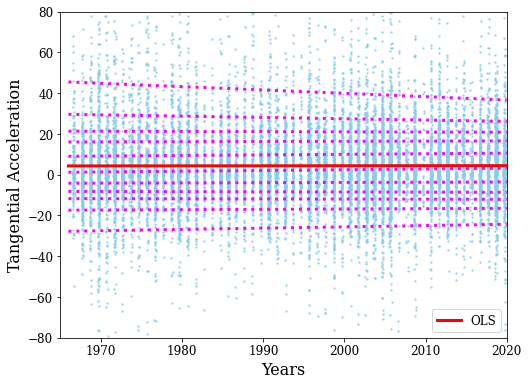

In [13]:
#x = np.arange(df.years.min(), df.years.max(), 50)

x = np.arange(1966,2021,1)

get_y = lambda a, b: a + b * x

n = 9
colors = pl.cm.jet(np.linspace(0,1,n))

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', linewidth=3, color='magenta')

y = get_y(ols['a'], ols['b'])


ax.scatter(df.Time, df.Data, s=2, color='skyblue',alpha=.7)
ax.plot(x, y, color='red', linewidth=3, label='OLS')
ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))

legend = ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel(ylabel, fontsize=16);
plt.savefig(output1)


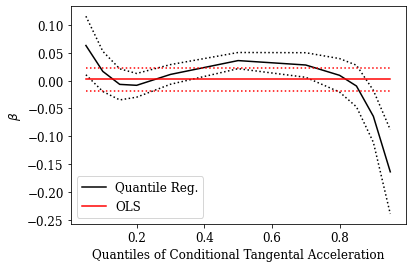

In [14]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta$')
plt.xlabel(xlabelString)
plt.legend()
#plt.show()
plt.savefig(output2)
